<a href="https://colab.research.google.com/github/andrerubeis/andrerubeis/blob/main/projectMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#%% IMPORTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action = 'ignore')

In [94]:
!nvidia-smi

Fri Aug 12 16:30:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading Dataset

In [95]:
path = r'/content/online_shoppers_intention.csv'
df = pd.read_csv(path)
df_copy = df.copy()

## Exploratory Data Analysis

### Categorical Features

In [96]:
### Categorical Features

#%% Categorical Features

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region',
                        'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

descriptions = ['string indicating month the pageview occurred.',
                'integer value that represents the user’s operating system at the time the page was viewed.',
                'integer value that represents the user’s browser at the time the page was viewed.',
                'region of the user is indicated by an integer value.',
                'category of traffic the user falls under is represented by an integer value.',
                'string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other',
                'boolean value indicating whether or not the session is on a weekend',
                'class label, boolean indicating whether or not the user completed the purchase.']

nans = [df.Month.isna().sum(),
                  df.OperatingSystems.isna().sum(),
                  df.Browser.isna().sum(),
                  df.Region.isna().sum(),
                  df.TrafficType.isna().sum(),
                  df.VisitorType.isna().sum(),
                  df.Weekend.isna().sum(),
                  df.Revenue.isna().sum()]

distinct_values =[df.Month.unique(),
                  df.OperatingSystems.unique(),
                  df.Browser.unique(),
                  df.Region.unique(),
                  df.TrafficType.unique(),
                  df.VisitorType.unique(),
                  df.Weekend.unique(),
                  df.Revenue.unique()]

count_values =  [df.Month.nunique(),
                 df.OperatingSystems.nunique(),
                 df.Browser.nunique(),
                 df.Region.nunique(),
                 df.TrafficType.nunique(),
                 df.VisitorType.nunique(),
                 df.Weekend.nunique(),
                 df.Revenue.nunique()]

df_categorical_features_description = pd.DataFrame()

df_categorical_features_description['Feature Name'] = categorical_features
df_categorical_features_description['Description'] = descriptions
df_categorical_features_description['NaNs'] = nans
df_categorical_features_description['Distinct Values'] = distinct_values
df_categorical_features_description['Distinct Count'] = count_values

df_categorical_features_description = df_categorical_features_description.sort_values('Feature Name')

del descriptions, distinct_values, count_values
df_categorical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_categorical_features_description.style.hide_index())

Feature Name,Description,NaNs,Distinct Values,Distinct Count
Browser,integer value that represents the user’s browser at the time the page was viewed.,0,[ 1 2 3 4 5 6 7 10 8 9 12 13 11],13
Month,string indicating month the pageview occurred.,0,['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'],10
OperatingSystems,integer value that represents the user’s operating system at the time the page was viewed.,0,[1 2 4 3 7 6 8 5],8
Region,region of the user is indicated by an integer value.,0,[1 9 2 3 4 5 6 7 8],9
Revenue,"class label, boolean indicating whether or not the user completed the purchase.",0,[False True],2
TrafficType,category of traffic the user falls under is represented by an integer value.,0,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20],20
VisitorType,"string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other",0,['Returning_Visitor' 'New_Visitor' 'Other'],3
Weekend,boolean value indicating whether or not the session is on a weekend,0,[False True],2


## Numerical Features

In [97]:
#%% Numerical Features

numerical_features = list(set(df.columns)-set(categorical_features))

descriptions = ['average page value over the value of the target page and/or the successful completion of an online purchase',
                'how many product related pages the user accessed',
                '#seconds spent on product related pages.',
                '#seconds spent on administrative pages',
                'how many pages of informational type the user accessed',
                'percentage of website pageviews actually end on that particular page',
                'proportion of users that arrive on that page of the website and leave without performing any further actions',
                'how many pages of administrative type the user accessed.',
                'closeness of the site visiting time to a special day',
                '#seconds spent on informational pages.']
nans = [df.PageValues.isna().sum(),
                  df.ProductRelated.isna().sum(),
                  df.ProductRelated_Duration.isna().sum(),
                  df.Administrative_Duration.isna().sum(),
                  df.Informational.isna().sum(),
                  df.ExitRates.isna().sum(),
                  df.BounceRates.isna().sum(),
                  df.Administrative.isna().sum(),
                  df.SpecialDay.isna().sum(),
                  df.Informational_Duration.isna().sum()]

mins =[df.PageValues.min(),
                  df.ProductRelated.min(),
                  df.ProductRelated_Duration.min(),
                  df.Administrative_Duration.min(),
                  df.Informational.min(),
                  df.ExitRates.min(),
                  df.BounceRates.min(),
                  df.Administrative.min(),
                  df.SpecialDay.min(),
                  df.Informational_Duration.min()]

maxs =[df.PageValues.max(),
                  df.ProductRelated.max(),
                  df.ProductRelated_Duration.max(),
                  df.Administrative_Duration.max(),
                  df.Informational.max(),
                  df.ExitRates.max(),
                  df.BounceRates.max(),
                  df.Administrative.max(),
                  df.SpecialDay.max(),
                  df.Informational_Duration.max()]

means =[df.PageValues.mean(),
                  df.ProductRelated.mean(),
                  df.ProductRelated_Duration.mean(),
                  df.Administrative_Duration.mean(),
                  df.Informational.mean(),
                  df.ExitRates.mean(),
                  df.BounceRates.mean(),
                  df.Administrative.mean(),
                  df.SpecialDay.mean(),
                  df.Informational_Duration.mean()]

stds =[df.PageValues.std(),
                  df.ProductRelated.std(),
                  df.ProductRelated_Duration.std(),
                  df.Administrative_Duration.std(),
                  df.Informational.std(),
                  df.ExitRates.std(),
                  df.BounceRates.std(),
                  df.Administrative.std(),
                  df.SpecialDay.std(),
                  df.Informational_Duration.std()]

count_values =  [df.PageValues.nunique(),
                  df.ProductRelated.nunique(),
                  df.ProductRelated_Duration.nunique(),
                  df.Administrative_Duration.nunique(),
                  df.Informational.nunique(),
                  df.ExitRates.nunique(),
                  df.BounceRates.nunique(),
                  df.Administrative.nunique(),
                  df.SpecialDay.nunique(),
                  df.Informational_Duration.nunique()]

df_numerical_features_description = pd.DataFrame()

df_numerical_features_description['Feature Name'] = numerical_features
df_numerical_features_description['Description'] = descriptions
df_numerical_features_description['NaNs'] = nans
df_numerical_features_description['Min'] = mins
df_numerical_features_description['Max'] = maxs
df_numerical_features_description['Mean'] = means
df_numerical_features_description['Std'] = stds
df_numerical_features_description['Distinct Count'] = count_values

df_numerical_features_description=df_numerical_features_description.sort_values('Feature Name')
df_numerical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_numerical_features_description.style.hide_index())
#print(df_numerical_features_description.to_string(index=False))

Feature Name,Description,NaNs,Min,Max,Mean,Std,Distinct Count
Administrative,#seconds spent on product related pages.,0,0.000000,63973.522230,1194.746220,1913.669288,9551
Administrative_Duration,how many pages of informational type the user accessed,0,0.000000,24.000000,0.503569,1.270156,17
BounceRates,percentage of website pageviews actually end on that particular page,0,0.000000,0.200000,0.043073,0.048597,4777
ExitRates,how many product related pages the user accessed,0,0.000000,705.000000,31.731468,44.475503,311
Informational,proportion of users that arrive on that page of the website and leave without performing any further actions,0,0.000000,0.200000,0.022191,0.048488,1872
Informational_Duration,how many pages of administrative type the user accessed.,0,0.000000,27.000000,2.315166,3.321784,27
PageValues,#seconds spent on informational pages.,0,0.000000,2549.375000,34.472398,140.749294,1258
ProductRelated,average page value over the value of the target page and/or the successful completion of an online purchase,0,0.000000,361.763742,5.889258,18.568437,2704
ProductRelated_Duration,#seconds spent on administrative pages,0,0.000000,3398.750000,80.818611,176.779107,3335
SpecialDay,closeness of the site visiting time to a special day,0,0.000000,1.000000,0.061427,0.198917,6


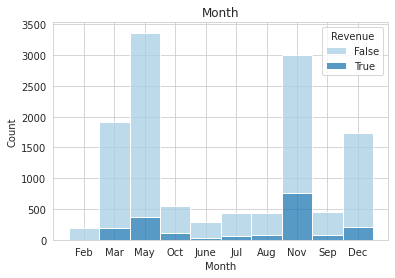

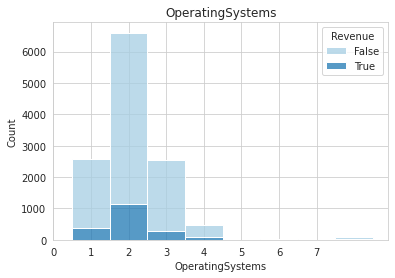

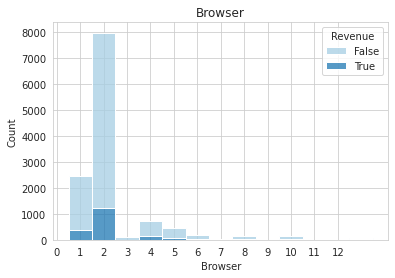

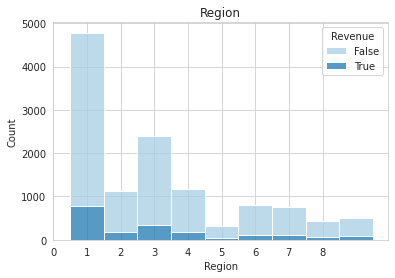

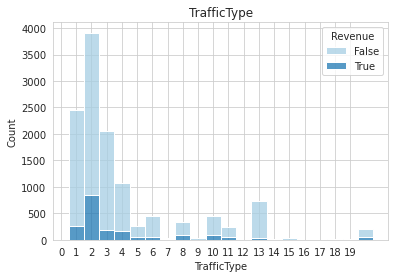

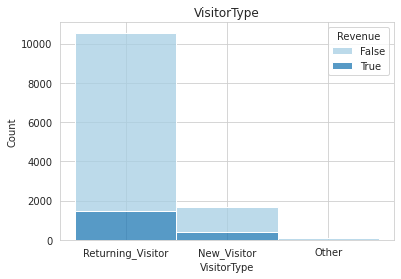

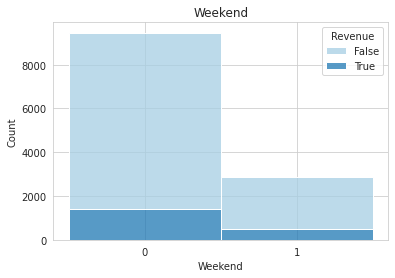

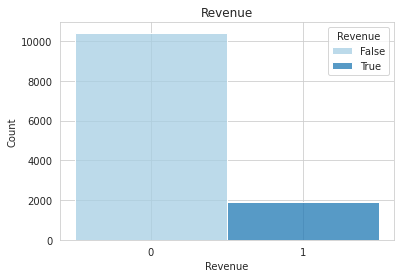

In [98]:
import datetime
import time

sns.color_palette("Paired")
for feature in categorical_features:
    plt.figure()
    n_bins = df[feature].nunique()
    sns.histplot(df, x = feature, hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
    plt.xticks(range(0,n_bins))
    plt.title(feature)
    plt.show()
    print("")

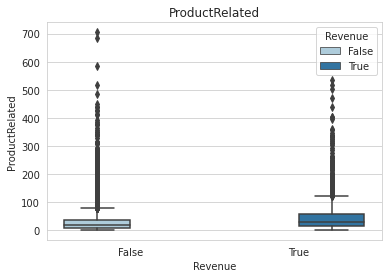

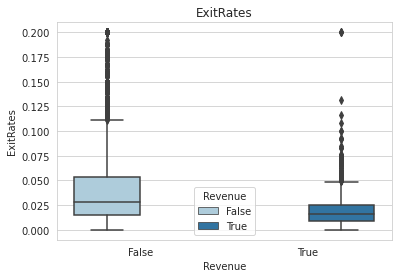

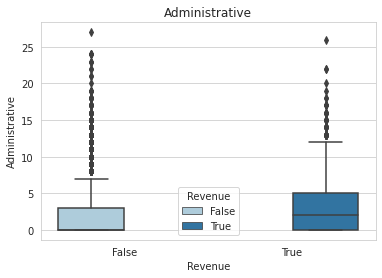

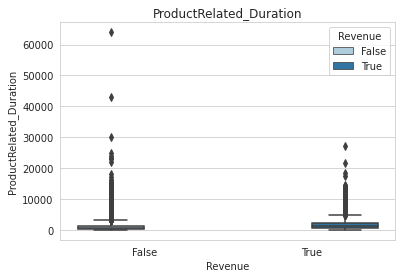

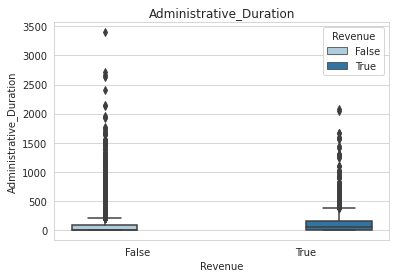

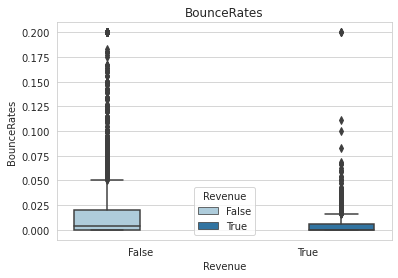

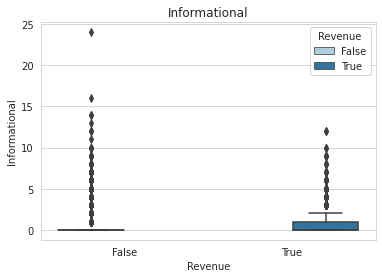

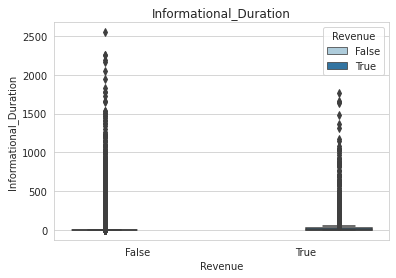

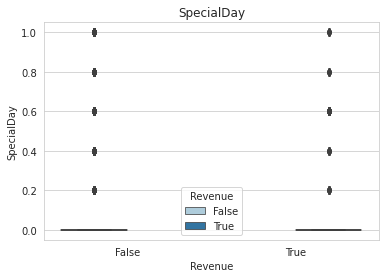

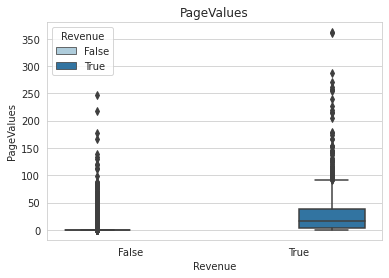

In [99]:

sns.set_style("whitegrid")
for feature in numerical_features: #-1 perchè così feature non assume 'Revenue'
    plt.figure()
    sns.boxplot(x= 'Revenue', y = feature, hue='Revenue', data = df,palette='Paired')
    plt.title(feature)
    plt.legend(title='Revenue')
    plt.show()
    print("")


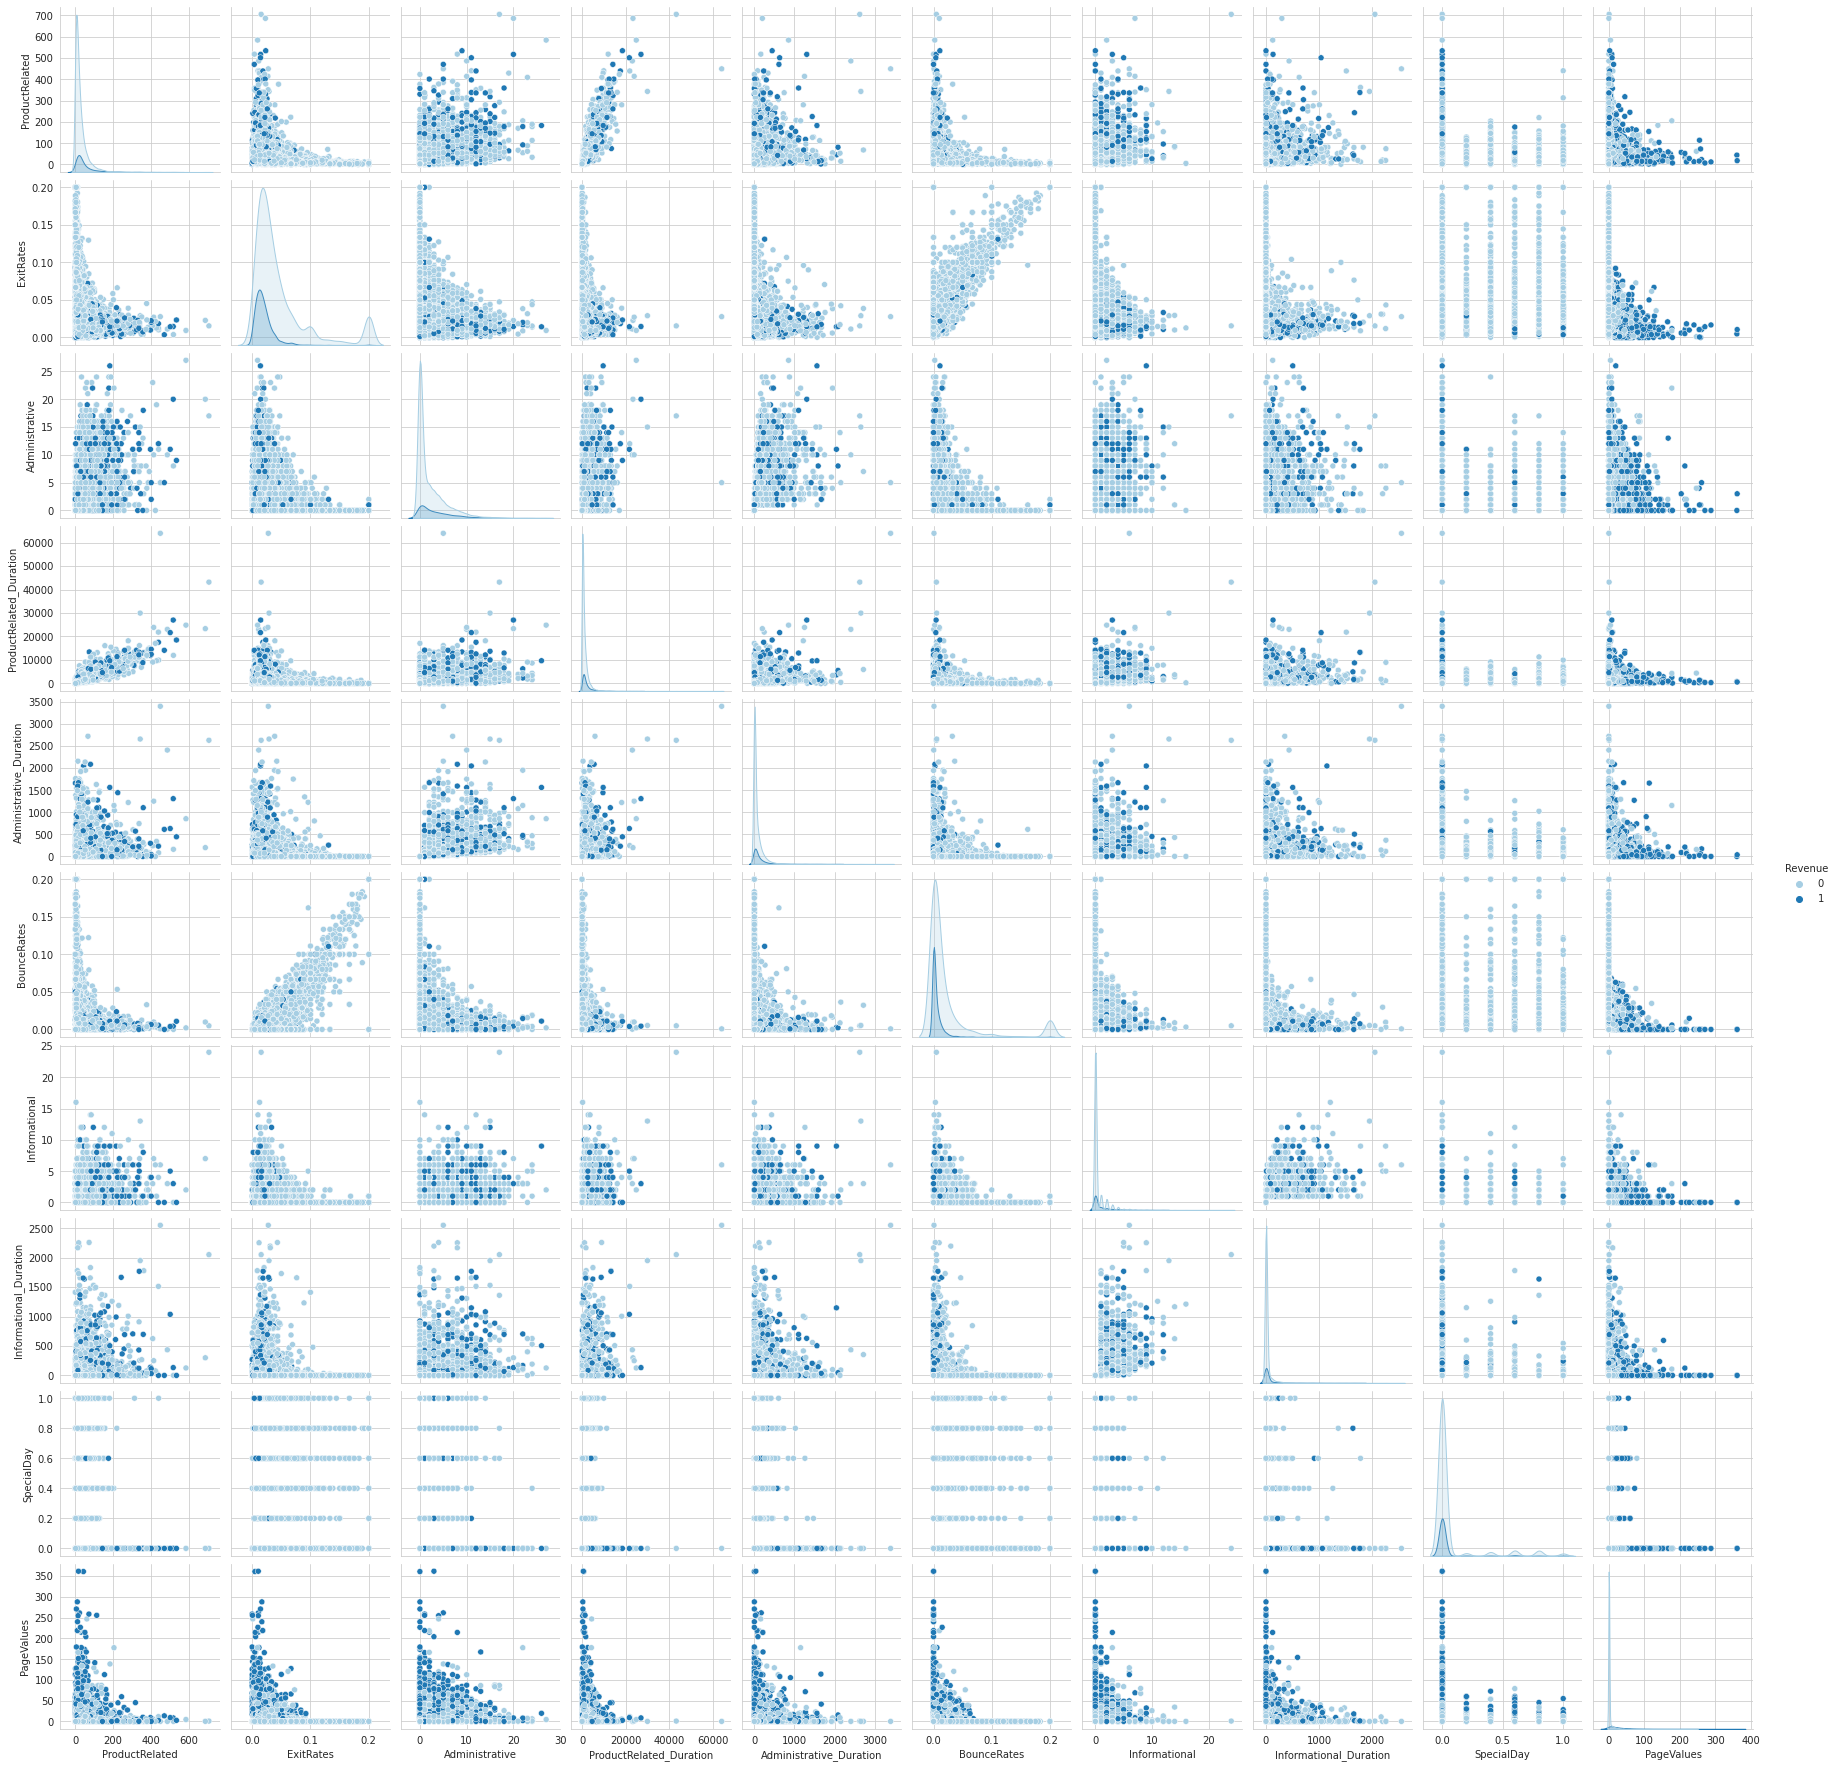

In [100]:
numerical_features = list(set(df.columns)-set(categorical_features))
numerical_features.append('Revenue') #aggiungo 'Revenue' in numerical features solo per fare la correlation matrix
df_numerical = df[numerical_features]
df_numerical.Revenue = df_numerical.Revenue.astype(int)
sns.pairplot(df_numerical, hue='Revenue', palette = 'Paired')

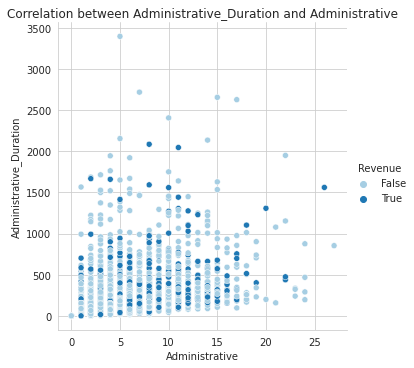

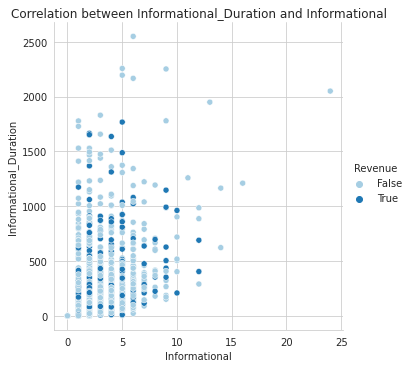

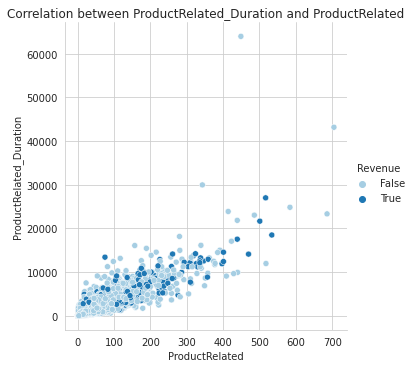

In [101]:
#%% SCATTER PLOTS

sns.relplot(x = 'Administrative', y = 'Administrative_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Administrative_Duration and Administrative")
plt.show()
print("")

sns.relplot(x = 'Informational', y = 'Informational_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Informational_Duration and Informational")
plt.show()
print("")

sns.relplot(x = 'ProductRelated', y = 'ProductRelated_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ProductRelated_Duration and ProductRelated")
plt.show()
print("")



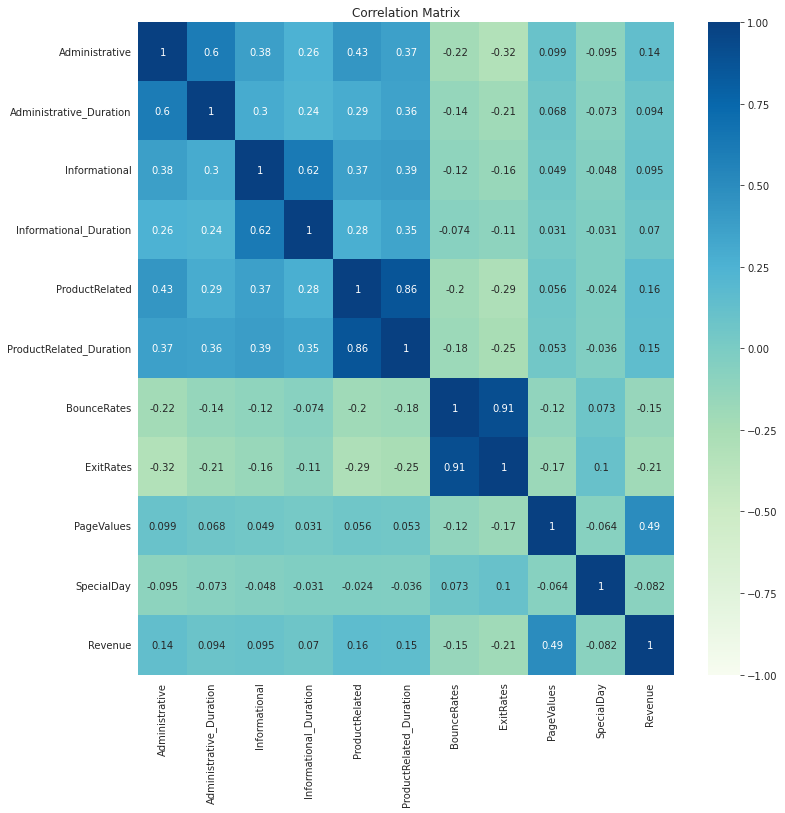

In [102]:
#%% CORRELATION MATRIX

numerical_df = df.drop(categorical_features[:-1], axis=1) #numerical df contiene tutte le numerical features più revenue
matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu')
plt.title("Correlation Matrix")
plt.show()

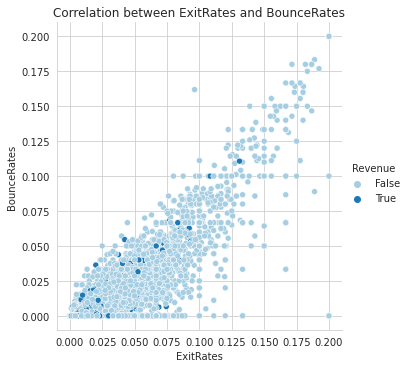

In [103]:
sns.relplot(x = 'ExitRates', y = 'BounceRates', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ExitRates and BounceRates")
plt.show()

## Data Cleaning

In [104]:
#Checking NaN values
print("Dataset information")
df.info()
print("")

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [105]:
#Convert bool type variables in integer type variables and properly write Months
df = df_copy.copy()
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df['Month'].replace('June', 'Jun', inplace=True)
df.Month = sorted(df.Month, key=lambda x: pd.to_datetime(x, format="%b"))

In [106]:
#Dropping correlated features seen in correlation matrix
features_dropped = ['BounceRates','Administrative_Duration', 'Informational_Duration','ProductRelated_Duration']
df = df.drop(columns=features_dropped, axis = 1)

## Preprocessing

Classifiers should be applied on numerical dataframes, so we need to first convert categorical features in numerical ones by applying the one-hot encoding technique. Then we procede with the standardization of the numerical features.

### One-Hot-Encoding of Categorical Features

In [107]:
numerical_features = list(set(numerical_features)-set(features_dropped))
#numerical_features.remove('Revenue')
# One hot encoding
dummy_columns = ['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend']

for column in categorical_features[1:-1]: #non considero Month nel ciclo perchè lo gestico a parte (1) e mi fermo prima di considerare Revenue (-1)
    df_dummies = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df, df_dummies], axis = 1)



# (NOT) Accounting for all months in the calendar except Jan and Apr not present (modifica poi per vedere che cambia se consideri tutti)
months = ['Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mx in months[1:]:    # drop_first = True
    df['Month_'+mx] = (df['Month'] == mx).astype('int64')

df = df.drop(columns = categorical_features[:-1]) #droppo tutte le categorical features tranne Revenue
df

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Revenue,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,...,Weekend_1,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,0,0,1,0.200000,0.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.100000,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.200000,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0.140000,0.000000,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,10,0.050000,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
12326,0,0,5,0.021333,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12327,0,0,6,0.086667,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12328,4,0,15,0.021053,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Standardization of Numerical Features

In [108]:
#Preparing for standardization

y = df.Revenue.copy()
numerical_features.remove('Revenue')
numerical_features

['ProductRelated',
 'ExitRates',
 'Administrative',
 'Informational',
 'SpecialDay',
 'PageValues']

In [110]:
import sklearn
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()#

# scaled_df  = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
# scaled_df2 = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
numerical_df = numerical_df[numerical_features]

scaled_numerical_df =  pd.DataFrame(ss.fit_transform(numerical_df), columns=numerical_df.columns)

categorical_features = list(set(df.columns)-set(numerical_features))
scaled_df = pd.concat([df[categorical_features], scaled_numerical_df], axis=1)

y = scaled_df['Revenue'].copy()
X = scaled_df.drop('Revenue',axis=1)

#Replace 0 values in categorical features with -1 to have mean = 0
scaled_df[categorical_features] = scaled_df[categorical_features].mask(scaled_df[categorical_features] == 0, -1)
scaled_df
# features_to_add = [e for e in numerical_features if e not in features_dropped]
# scaled_df_categorical = df.drop(columns=features_to_add, axis=1)
# scaled_df = pd.concat([scaled_numerical_df, scaled_df_categorical], axis = 1)

,Region_2,Region_4,TrafficType_2,Region_5,Browser_12,TrafficType_11,TrafficType_16,Browser_2,TrafficType_3,OperatingSystems_6,...,Month_Aug,Browser_11,Browser_13,TrafficType_12,ProductRelated,ExitRates,Administrative,Informational,SpecialDay,PageValues
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-0.691003,3.229316,-0.696993,-0.396478,-0.308821,-0.317178
1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-0.668518,1.171473,-0.696993,-0.396478,-0.308821,-0.317178
2,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-0.691003,3.229316,-0.696993,-0.396478,-0.308821,-0.317178
3,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-0.668518,1.994610,-0.696993,-0.396478,-0.308821,-0.317178
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-0.488636,0.142551,-0.696993,-0.396478,-0.308821,-0.317178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,0.478227,-0.288966,0.206173,-0.396478,-0.308821,0.342125
12326,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-0.601062,-0.447364,-0.696993,-0.396478,-0.308821,-0.317178
12327,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-0.578577,0.897093,-0.696993,-0.396478,-0.308821,-0.317178
12328,-1,-1,-1,-1,-1,1,-1,1,-1,-1,...,-1,-1,-1,-1,-0.376210,-0.453140,0.507228,-0.396478,-0.308821,-0.317178


## Training

0.9067539347984016 expressed by 26 components


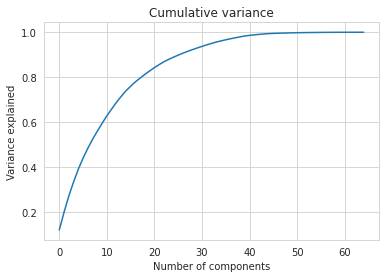

In [89]:
#%% PCA
from sklearn.decomposition import PCA
PCA_df = PCA().fit(scaled_df)
pca_df = PCA_df.transform( scaled_df)

cumvar = np.cumsum(PCA_df.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)

#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [90]:
'Revenue' in scaled_df.columns

True

In [23]:
from sklearn.model_selection import train_test_split

seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9864, 64), (2466, 64), (9864,), (2466,))

### Balancement of the dataset 

* **Undersampling**: NearMiss
* **Oversampling**: SMOTE
* **Oversampling-Undersampling**: SMOTETomekLinks techniques.

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 

In [25]:
from collections import Counter

def plot_balance_df (X_train, y_train, sampling):
  balanced_df = pd.concat([X_train, y_train], axis=1)
  balanced_df=balanced_df.rename(columns={0: 'Revenue'})

 
  # plt.figure()
  # counter = Counter(y_train)
  # print(counter)
  # # scatter plot of examples by class label
  # for label, _ in counter.items():
  #   row_ix = np.where(y_train == label)[0]
  #   plt.scatter(balanced_df[row_ix, 0], balanced_df[row_ix, 1], label=str(label))
  # plt.legend()
  # plt.show()

  plt.figure()
  n_bins = balanced_df['Revenue'].nunique()
  sns.histplot(balanced_df, x = 'Revenue', hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
  plt.title('Class balance ('+ sampling+')')
  plt.show()

In [26]:
sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)
                 
X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [25]:
# from imblearn.under_sampling import NearMiss 
# undersample = NearMiss(version=1, n_neighbors=3)
# #tl = TomekLinks(sampling_strategy='minority ')
# X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)

# #y_train_nearmiss.plot.bar()

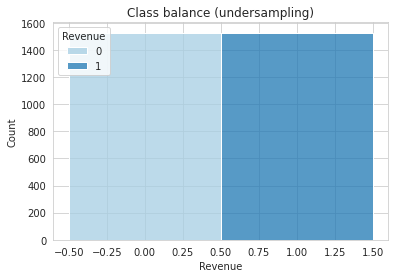

In [27]:
sampling = 'undersampling'
plot_balance_df(X_train_nearmiss, y_train_nearmiss, sampling)

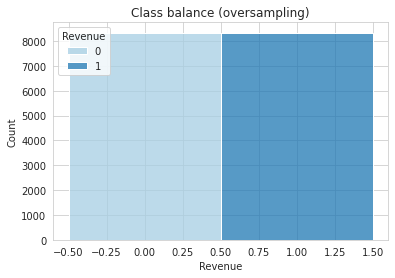

In [28]:
sampling = 'oversampling'
plot_balance_df(X_train_smote, y_train_smote, sampling)

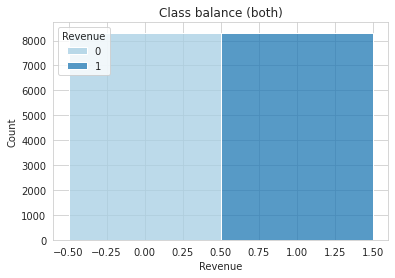

In [29]:
sampling = 'both'
plot_balance_df(X_train_smote_tomek, y_train_smote_tomek, sampling)

### Models Hyperparameters
Run the following cell only if models dictionary has not been saved, otherwise load the corresponding pickle file to avoid to retrain every model.

In [29]:
# # PREPARING DATA STRUCTURE WHERE TO STORE THE RESULTS OF MODELS
# models = {}
# models = {'LR': LogisticRegression(),
#           'KNN': KNeighborsClassifier(),
#           'SVM': SVC(),
#           'RF': RandomForestClassifier()}

# models_names = ['LR', 'KNN', 'SVM', 'RF']
# hyperparams = {}

# # define logistic regression grid search params
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalties = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # # define grid search KNN
# n_neighbors = range(1, 10)
# weights = ['uniform', 'distance']
# metrics = ['euclidean', 'manhattan', 'minkowski']

# # define SVM params
# kernels = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gammas = ['scale']

# # # define grid search RF
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']

# datasets = ['original', 'undersampling', 'oversampling', 'both']

# for dataset in datasets:
#   models[dataset] = {}
#   for name in models_names:
#     models[dataset][name] = {}

#     #LOGISTIC REGRESSION
#     if name == 'LR':
#       #models[dataset][name]['model'] = LogisticRegression()

#       for solver in solvers:
#         models[dataset][name][solver] = {}

#         for penalty in penalties:
#           models[dataset][name][solver][penalty] = {}

#           for c in c_values:
#             models[dataset][name][solver][penalty][c] = {}


#     elif name == 'KNN':
      
#       #models[dataset][name]['model'] = KNeighborsClassifier()

#       for neighbor in n_neighbors:
#         models[dataset][name][neighbor] = {}

#         for w in weights:
#           models[dataset][name][neighbor][w] = {}

#           for metric in metrics:
#             models[dataset][name][neighbor][w][metric] = {}


#     elif name == 'SVM':

#       #models[dataset][name]['model'] = SVC()

#       for kernel in kernels:
#           models[dataset][name][kernel] = {}

#           for gamma in gammas:
#             models[dataset][name][kernel][gamma] = {}
            
#             for c in C:
#               models[dataset][name][kernel][gamma][c]  ={}
  
#     elif name == 'RF':
#       #models[name] = {'model': RandomForestClassifier()}

#       for estimator in n_estimators:
#         models[dataset][name][estimator] = {}

#         for feature in max_features:
#           models[dataset][name][estimator][feature] = {}
        



# # for solver in solvers:
# #   models 
# #   for penalty in penalties:
# #     for c in c_values:


# # # define grid search
# # gridLR = dict(solver=solvers,penalty=penalty,C=c_values)
# # hyperparams['LR'] = gridLR
# # hyperparams['LR']['results'] = [] #list of cr results each fold

# # # define grid search
# # n_neighbors = range(1, 10)
# # weights = ['uniform', 'distance']
# # metric = ['euclidean', 'manhattan', 'minkowski']

# # # define grid search
# # gridKNN = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# # hyperparams['KNN'] = gridKNN
# # hyperparams['KNN']['results'] = [] #list of cr results each fold

# # # define grid search
# # kernel = ['poly', 'rbf', 'sigmoid']
# # C = [50, 10, 1.0, 0.1, 0.01]
# # gamma = ['scale']

# # # define grid search
# # gridSVM = dict(kernel=kernel,C=C,gamma=gamma)

# # hyperparams['SVM'] = gridSVM
# # hyperparams['SVM']['results'] = [] #list of cr results each fold

# # # define grid search
# # n_estimators = [10, 100, 1000]
# # max_features = ['sqrt', 'log2']


# # # define grid search
# # gridRF = dict(n_estimators=n_estimators,max_features=max_features)
# # hyperparams['RF'] = gridRF
# # hyperparams['RF']['results'] = [] #list of cr results each fold


                    

In [30]:
import pickle
path = r'/content/results_without_PCA.pkl'
with open(path, 'rb') as f:
    models = pickle.load(f)
#models['both']['RF']

In [31]:
# def return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train, exit = False):
# """
# Inputs: 

# - idx_start_val: index of the first element of the current validation dataset
# - idx_stop_val: index of the last element of the current validation dataset
# - X_train: 80% of original dataset (without class label Revenue)
# - y_train: 80% of original class label 'Revenue'

# Returns:

# - X_train_train: the training dataset at iteration i (9/10 of X_train)
# - X_val_train: the validation dataset at iteration i (1/10 of X_train)
# - y_train_train: the training class label at iteration i (9/10 of y_train)
# - y_val_train: the validation class label at iteration i (1/10 of y_train)
# """  
#   # idx_start_val = 0
#   # idx_stop_val = n_samples_val-1
#   # i=0
#   # exit = False
#   # print(solver + " " + penalty + " " + str(c))
#   # for i, idx in enumerate(range(0, n_samples_training-1, n_samples_val-1)): #iter over indexes

#       #Quando arrivo alla fine del training dataset può succedere che 
#       #l'ultimo fold non sia multiplo di n_samples_val, perciò faccio un 
#       #controllo e allungo il validation dataset fino alla fine del 
#       #training dataset
#   # if X_train.iloc[idx_stop_val:n_samples_training-1].shape[0] < n_samples_val:
#   #     idx_stop_val = n_samples_training
#   #     #idx_start_val = idx_stop_val - n_samples_val
#   #     exit = True
#   #     #return X_train_train, X_val_train, y_train_train, y_val_train
  
#   #if exit == False:
#   X_val_train = X_train.iloc[idx_start_val:idx_stop_val]
#   y_val_train = y_train.iloc[idx_start_val:idx_stop_val]

#   #print(X_val_train.shape)
#   X_train_train_sx = X_train.iloc[0:idx_start_val]
#   X_train_train_dx = X_train.iloc[idx_stop_val: n_samples_training-1]
#   print(X_train_train_sx.shape, X_train_train_dx.shape, idx_start_val, idx_stop_val)
#   y_train_train_sx = y_train.iloc[0:idx_start_val]
#   y_train_train_dx = y_train.iloc[idx_stop_val: n_samples_training-1]


#   #Concat the training dataframe at the left of validation dataset with the one on the right
#   #to obtain a unique training dataset to use to fit the classifier
#   X_train_train = pd.concat([X_train_train_sx, X_train_train_dx], axis=0)
#   y_train_train = pd.concat([y_train_train_sx, y_train_train_dx], axis=0)

#   return X_train_train, X_val_train, y_train_train, y_val_train

In [32]:
# from ssl import SSLCertVerificationError
# def retrieve_params_model(model_name):
  
#   if model_name == 'LR':
#     # define logistic regression grid search params
#     param1 = ['newton-cg', 'lbfgs', 'liblinear']      #solvers
#     param2 = ['l2']                                   #penalty
#     param3 = [100, 10, 1.0, 0.1, 0.01]                #C
#     model = LogisticRegression()

#   elif model_name == 'KNN':
#     # # define grid search KNN
#     param1 = range(1, 10)                             #n_neighbors
#     param2 = ['uniform', 'distance']                  #weights
#     param3 = ['euclidean', 'manhattan', 'minkowski']  #metrics
#     model = KNeighborsClassifier()

#   elif model_name == 'SVM':
#     # define SVM params
#     param1 = ['poly', 'rbf', 'sigmoid']               #krnels
#     param3 =  [50, 10, 1.0, 0.1, 0.01]                #gamma
#     param2 = ['scale']                                #C

#     model = SVC()

#   else: #RF
#     param1 = [10, 100, 1000]                          #n_estimators
#     param2 = ['sqrt', 'log2']                         #max_features
#     param3 = '-'
#     model = RandomForestClassifier()


#   return param1, param2, param3, model

In [33]:
# def train_validate_model(models, model_name, X_train, y_train, smote =True, nearmiss = False):

#   #Retrieve all the hyperparams we want to test of the current model
#   params1, params2, params3, model = retrieve_params_model(model_name)

#   #Decide which scenario we want to implement
#   if smote == False and nearmiss == False:
#     dataset = 'original'
#   elif smote == True and nearmiss == False:
#     dataset = 'oversampling'
#   elif smote == False and nearmiss == True:
#     dataset = 'undersampling'
#   else:
#     dataset = 'both'

  
#   weighted_performances = {'Accuracy': 0,
#                            'Precision': 0,
#                            'Recall': 0,
#                            'Best F1-score': 0}
#   performances = {'Accuracy': 0,
#                   'Precision': 0,
#                   'Recall': 0,
#                   'Best F1-score': 0}
#   best_f1 = 0          #to pick the best model I evaluate f1-score

#   #Grid Search
#   for param1 in params1:
#     for param2 in params2:
#       for param3 in params3:
            
#           #Setting model parameters
#           if model_name == 'LR':
#             model = LogisticRegression(solver=param1, penalty = param2, C= param3)
          
#           elif model_name == 'KNN':
#             model = KNeighborsClassifier(n_neighbors=param1, weights = param2, metric = param3)

#           elif model_name == 'SVM':
#             model = SVC(kernel=param1, gamma=param2, C=param3)
          
#           else:
#             model = RandomForestClassifier(n_estimators=param1, max_features=param2)
          
#           print(model_name, param1, param2, param3)

#           #K-Cross Validation
#           idx_start_val = 0
#           idx_stop_val = n_samples_val-1
#           i=0
#           exit = False

#           sum_acc = 0
#           sum_prec = 0
#           sum_rec = 0
#           sum_f1 = 0

#           performances['Best F1-score'] = 0
#           performances['Accuracy'] = 0
#           performances['Precision'] = 0
#           performances['Recall'] = 0

#           weighted_performances['Best F1-score'] = 0
#           weighted_performances['Accuracy'] = 0
#           weighted_performances['Precision'] = 0
#           weighted_performances['Recall'] = 0
         
#           for i in range(n_splits): #10 total iterations for each combination of hyperparams
#             print(i)

#             #Checking if the last fold is a multiple of n_samples_val, if not we set the last element of the validation dataset to 
#             #the last element of X_train so the last validation dataset will be a bit longer (990) than the nine seen before (986)
#             if X_train.iloc[idx_stop_val:n_samples_training-1].shape[0] < n_samples_val or idx_start_val > idx_stop_val:
#               idx_stop_val = n_samples_training-1
#               #break
#             if idx_start_val < idx_stop_val:
#               X_train_train, X_val_train, y_train_train, y_val_train = return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train)
#             else:
#               break
            
#             idx_start_val = idx_stop_val+1
#             idx_stop_val = idx_stop_val + n_samples_val
            
#             #Before training the classifiers we should apply resampling techniques
#             # ONLY to training datasets and leave as it is the validation dataset.

#             #Oversampling and Undersampling scenario
#             if smote == True and nearmiss == True:
#               X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train_train, y_train_train)
#               model = model.fit(X_train_smote_tomek, y_train_smote_tomek)
            
#             #Undersampling scenario
#             elif smote == False and nearmiss == True:
#               X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train_train, y_train_train)
#               model = model.fit(X_train_nearmiss, y_train_nearmiss)
            
#             #Oversampling scenario
#             elif smote == True and nearmiss == False:
#               X_train_smote, y_train_smote = sm.fit_resample(X_train_train, y_train_train)
#               model = model.fit(X_train_smote, y_train_smote)
            
#             #Original scenario
#             else:
#               print("original")
#               model = model.fit(X_train_train, y_train_train)
              
#             #Validation on current fold
#             y_pred_val = model.predict(X_val_train)

#             #Print the results and store the results obtained
#             cr = classification_report(y_pred_val, y_val_train, output_dict=True)
#             print(cr)
#             print("")

#             if model_name == 'RF':
#               models[dataset][model_name][param1][param2]= cr
#             else:
#               models[dataset][model_name][param1][param2][param3] =cr

#             performances['Best F1-score'] = performances['Best F1-score'] + cr['macro avg']['f1-score']
#             performances['Accuracy'] = performances['Accuracy'] + cr['accuracy']
#             performances['Precision'] = performances['Precision'] + cr['macro avg']['precision']
#             performances['Recall'] = performances['Recall'] + cr['macro avg']['recall']

#             weighted_performances['Best F1-score'] = weighted_performances['Best F1-score'] + cr['weighted avg']['f1-score']
#             weighted_performances['Accuracy'] = weighted_performances['Accuracy'] + cr['accuracy']
#             weighted_performances['Precision'] = weighted_performances['Precision'] + cr['weighted avg']['precision']
#             weighted_performances['Recall'] = weighted_performances['Recall'] + cr['weighted avg']['recall']

#             sum_f1 = sum_f1 + cr['weighted avg']['f1-score']
#             sum_prec = sum_prec + cr['weighted avg']['precision']
#             sum_rec = sum_rec + cr['weighted avg']['recall']
#             sum_acc = sum_acc + cr['accuracy']
          
#           #Compute the mean of the results after the 10 iterations of a specific
#           #combination of hyperparameters are completed and see if outperforms the
#           #results reached for a different combination seen before.
#           mean_f1 = sum_f1/n_splits
#           mean_prec = sum_prec/n_splits
#           mean_rec = sum_rec/n_splits
#           mean_acc = sum_acc/n_splits

#           weighted_performances['Best F1-score'] = weighted_performances['Best F1-score']/n_splits
#           weighted_performances['Accuracy'] = weighted_performances['Accuracy']/n_splits
#           weighted_performances['Precision'] = weighted_performances['Precision']/n_splits
#           weighted_performances['Recall'] = weighted_performances['Recall']/n_splits

#           performances['Best F1-score'] = performances['Best F1-score']/n_splits
#           performances['Accuracy'] = performances['Accuracy']/n_splits
#           performances['Precision'] = performances['Precision']/n_splits
#           performances['Recall'] = performances['Recall']/n_splits

#           #Store best weighted f1-score and the current hyperparams 
#           if( mean_f1 > best_f1):
#             best_f1 = mean_f1
#             print(f"Best f1-score: {best_f1:.3f} - [{param1}, {param2}, {param3}]")



#             if model_name == 'RF':
#               models[dataset][model_name]['bestParamsF1'] = [best_f1, mean_acc, mean_prec, mean_rec, param1, param2]
#               models[dataset][model_name]['WeightedBestParamsF1'] = weighted_performances
#               models[dataset][model_name]['NormalBestParamsF1'] = performances
#             else:
#               models[dataset][model_name]['bestParamsF1'] = [best_f1, mean_acc, mean_prec, mean_rec, param1, param2, param3]
#               models[dataset][model_name]['WeightedBestParamsF1'] = weighted_performances
#               models[dataset][model_name]['NormalBestParamsF1'] = performances

            
           

#   return models

In [31]:
#%% INITIALIZATION OF PARAMETERS FOR CROSS VALIDATION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

from sklearn.metrics import classification_report


#Take X_train and split it in n_splits folds to perform cross validation
#one of them is used to validate and the others to train the models
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 

#fig, ax = plt.subplots()
# cmap_data = plt.cm.Paired
# cmap_cv = plt.cm.coolwarm

n_splits = 10

sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)

#tl = TomekLinks(sampling_strategy='minority ')


n_samples_training = X_train.shape[0]
n_samples_val = int(n_samples_training/n_splits)
print(n_samples_training, n_samples_val)

#start and stop are indexes used to delimit the current validation dataset
#at the beginning are 0 and n_samples_val-1, then will be n_smaples, 2*n_samples_val-1 and so on
idx_start_val = 0
idx_stop_val = n_samples_val-1


#Decide which classifier to train and which scenario to implement

#model_name = 'SVM'
#models[dataset][model_name]
#models = train_validate_model(models, model_name, X_train, y_train, smote =False, nearmiss = False)



9864 986


In [32]:
#Save results for a certain model and scenario
# import pickle
# path_save_results = r'C:\Users\andre\OneDrive\Documenti\GitHub\Online Shoppers Intention'
# with open(path_save_results+'\results.pkl', 'wb') as f:
#     pickle.dump(models, f)

In [33]:
#Load the models dictionary with all the results obtained for every model and scenario
import pickle
path = r'/content/results_without_PCA.pkl'
with open(path, 'rb') as f:
    models = pickle.load(f)

## Test

In [34]:
sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)
                 
X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [35]:
datasets = ['original', 'undersampling', 'oversampling', 'both']
models_names = ['LR', 'KNN', 'SVM', 'RF']

results = {}

for d in datasets:
  results[d] = {}
  for mn in models_names:
    results[d][mn] = {}
    results[d][mn]['params'] = {}
    results[d][mn]['predictions'] = {}

results

{'both': {'KNN': {'params': {}, 'predictions': {}},
  'LR': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}}},
 'original': {'KNN': {'params': {}, 'predictions': {}},
  'LR': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}}},
 'oversampling': {'KNN': {'params': {}, 'predictions': {}},
  'LR': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}}},
 'undersampling': {'KNN': {'params': {}, 'predictions': {}},
  'LR': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}}}}

In [54]:
from sklearn.metrics import confusion_matrix

def confusion_matrixes (model_name, dataset):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  if model_name == 'LR':
    model_title = 'Logistic Regression'
    cmap_model = 'GnBu'
  elif model_name == 'KNN':
    model_title = 'K-Nearest Neighbors'
    cmap_model = 'YlOrBr'
  elif model_name == 'SVM':
    model_title = 'Support Vector Machine'
    cmap_model = 'OrRd'
  else:
    model_title = 'Random Forest'
    cmap_model = 'BuGn'

  plt.figure()
  cm = confusion_matrix(y_test, results[dataset][model_name]['predictions'])
  
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='', cmap=cmap_model)
  #sns.heatmap(cm_original/np.sum(cm_original), annot=True, fmt='.3f', vmin=0, vmax=1,center=0.5 ,cmap='GnBu')
  plt.title(f"Confusion Matrix {model_title} ({dataset_title})")
  


In [58]:
from sklearn import metrics
def auroc (model_name, dataset):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  fpr, tpr, threshold = metrics.roc_curve(y_test, results[dataset][model_name]['predictions'])
  roc_auc = metrics.auc(fpr, tpr)

  print(f'{model_name} - AUROC {dataset_title}: ', roc_auc)

### Logistic Regression

In [39]:
#Retrieve best params for each technique used
print('original: ', models['original']['LR']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['LR']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['LR']['bestParamsF1'][-3:])
print('both: ', models['both']['LR']['bestParamsF1'][-3:])

original:  ['liblinear', 'l2', 0.1]
undersampling:  ['liblinear', 'l2', 0.01]
oversampling:  ['liblinear', 'l2', 0.01]
both:  ['liblinear', 'l2', 0.01]


In [64]:
#params['original']['LR'] = {}

results['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.1}
results['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['oversampling']['LR']['params']={'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['both']['LR']['params'] = {'solver':'liblinear', 'penalty':'l2', 'C':0.01}

In [65]:
lr = LogisticRegression()

#predictions['LR'] = {}

results['original']['LR']['predictions']= lr.set_params(**results['original']['LR']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['LR']['predictions'] = lr.set_params(**results['undersampling']['LR']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['LR']['predictions'] = lr.set_params(**results['oversampling']['LR']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['LR']['predictions'] = lr.set_params(**results['both']['LR']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

In [66]:
print(classification_report(results['original']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['LR']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['LR']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.9832053742802304, 'recall': 0.8889370932754881, 'f1-score': 0.9336978810663021, 'support': 2305}, '1': {'precision': 0.3298429319371728, 'recall': 0.782608695652174, 'f1-score': 0.4640883977900553, 'support': 161}, 'accuracy': 0.8819951338199513, 'macro avg': {'precision': 0.6565241531087016, 'recall': 0.835772894463831, 'f1-score': 0.6988931394281788, 'support': 2466}, 'weighted avg': {'precision': 0.9405487022537777, 'recall': 0.8819951338199513, 'f1-score': 0.9030380567323704, 'support': 2466}}
{'0': {'precision': 0.789827255278311, 'recall': 0.9547563805104409, 'f1-score': 0.8644957983193278, 'support': 1724}, '1': {'precision': 0.7958115183246073, 'recall': 0.40970350404312667, 'f1-score': 0.5409252669039145, 'support': 742}, 'accuracy': 0.7907542579075426, 'macro avg': {'precision': 0.7928193868014591, 'recall': 0.6822299422767838, 'f1-score': 0.7027105326116212, 'support': 2466}, 'weighted avg': {'precision': 0.7916278729507976, 'recall': 0.7907542579075426

Test dataset samples:  2466



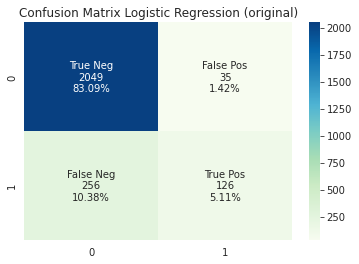

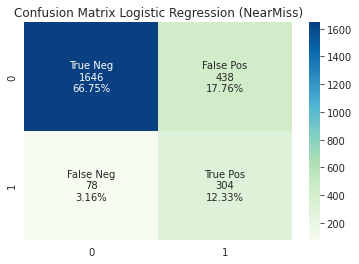

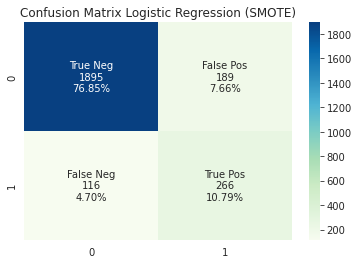

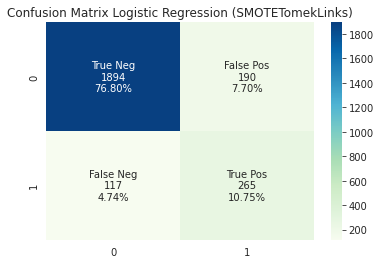

In [67]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('LR', 'original')
confusion_matrixes('LR', 'undersampling')
confusion_matrixes('LR', 'oversampling')
confusion_matrixes('LR', 'both')

### ROC Curves

In [68]:
auroc ('LR', 'original')
auroc ('LR', 'undersampling')
auroc ('LR', 'oversampling')
auroc ('LR', 'both')

LR - AUROC original:  0.6565241531087016
LR - AUROC NearMiss:  0.7928193868014591
LR - AUROC SMOTE:  0.8028220498236375
LR - AUROC SMOTETomekLinks:  0.8012732260755093


### KNN 

In [72]:
print('original: ', models['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models['both']['KNN']['bestParamsF1'][-3:])

original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']


In [73]:
results['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
results['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

In [74]:
knn = KNeighborsClassifier()

results['original']['KNN']['predictions'] = knn.set_params(**results['original']['KNN']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['KNN']['predictions'] = knn.set_params(**results['undersampling']['KNN']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['KNN']['predictions'] = knn.set_params(**results['oversampling']['KNN']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['KNN']['predictions'] = knn.set_params(**results['both']['KNN']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

In [75]:
print(classification_report(results['original']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['KNN']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['KNN']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.9875239923224568, 'recall': 0.8757446808510638, 'f1-score': 0.9282814614343707, 'support': 2350}, '1': {'precision': 0.2356020942408377, 'recall': 0.7758620689655172, 'f1-score': 0.36144578313253006, 'support': 116}, 'accuracy': 0.8710462287104623, 'macro avg': {'precision': 0.6115630432816472, 'recall': 0.8258033749082905, 'f1-score': 0.6448636222834504, 'support': 2466}, 'weighted avg': {'precision': 0.9521537813826887, 'recall': 0.8710462287104623, 'f1-score': 0.9016176582376905, 'support': 2466}}
{'0': {'precision': 0.8474088291746641, 'recall': 0.9089037570766856, 'f1-score': 0.8770797119443756, 'support': 1943}, '1': {'precision': 0.5366492146596858, 'recall': 0.3919694072657744, 'f1-score': 0.45303867403314924, 'support': 523}, 'accuracy': 0.7992700729927007, 'macro avg': {'precision': 0.692029021917175, 'recall': 0.65043658217123, 'f1-score': 0.6650591929887624, 'support': 2466}, 'weighted avg': {'precision': 0.78150157921873, 'recall': 0.7992700729927007,

Test dataset samples:  2466


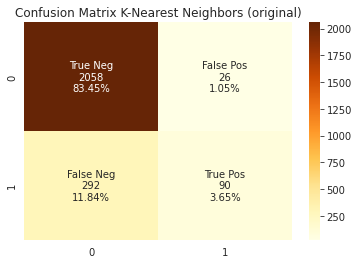

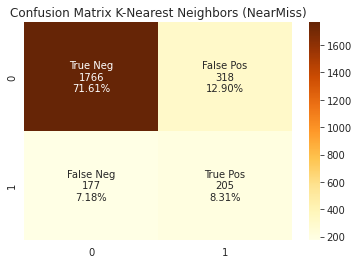

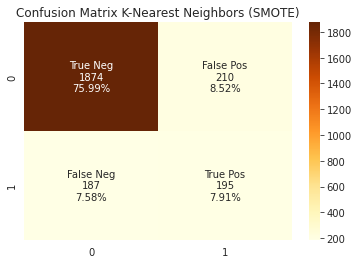

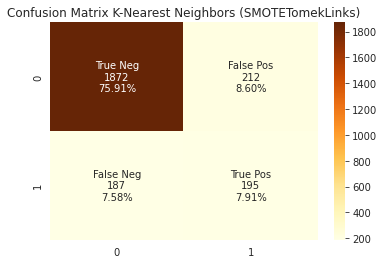

In [76]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('KNN', 'original')
confusion_matrixes('KNN', 'undersampling')
confusion_matrixes('KNN', 'oversampling')
confusion_matrixes('KNN', 'both')

In [77]:
auroc ('KNN', 'original')
auroc ('KNN', 'undersampling')
auroc ('KNN', 'oversampling')
auroc ('KNN', 'both')

KNN - AUROC original:  0.6115630432816472
KNN - AUROC NearMiss:  0.6920290219171749
KNN - AUROC SMOTE:  0.7048517249349318
KNN - AUROC SMOTETomekLinks:  0.7043718784857955


### SVM

In [78]:
#Retrieve best params for each technique used
print('original: ', models['original']['SVM']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['SVM']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['SVM']['bestParamsF1'][-3:])
print('both: ', models['both']['SVM']['bestParamsF1'][-3:])

original:  ['rbf', 'scale', 0.01]
undersampling:  ['poly', 'scale', 0.01]
oversampling:  ['poly', 'scale', 0.01]
both:  ['poly', 'scale', 0.01]


In [79]:
results['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
results['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

In [80]:
svm = SVC()

results['original']['SVM']['predictions'] = svm.set_params(**results['original']['SVM']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['SVM']['predictions'] = svm.set_params(**results['undersampling']['SVM']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['SVM']['predictions'] = svm.set_params(**results['oversampling']['SVM']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['SVM']['predictions'] = svm.set_params(**results['both']['SVM']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

In [81]:
print(classification_report(results['original']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['SVM']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['SVM']['predictions'], y_test, output_dict=True))

{'0': {'precision': 0.994721689059501, 'recall': 0.869182389937107, 'f1-score': 0.9277243231147908, 'support': 2385}, '1': {'precision': 0.18324607329842932, 'recall': 0.8641975308641975, 'f1-score': 0.3023758099352052, 'support': 81}, 'accuracy': 0.8690186536901865, 'macro avg': {'precision': 0.5889838811789652, 'recall': 0.8666899604006522, 'f1-score': 0.615050066524998, 'support': 2466}, 'weighted avg': {'precision': 0.9680673805126043, 'recall': 0.8690186536901865, 'f1-score': 0.9071836785213008, 'support': 2466}}
{'0': {'precision': 0.9083493282149712, 'recall': 0.8878986866791745, 'f1-score': 0.8980075901328273, 'support': 2132}, '1': {'precision': 0.3743455497382199, 'recall': 0.4281437125748503, 'f1-score': 0.3994413407821229, 'support': 334}, 'accuracy': 0.8256285482562855, 'macro avg': {'precision': 0.6413474389765955, 'recall': 0.6580211996270124, 'f1-score': 0.6487244654574751, 'support': 2466}, 'weighted avg': {'precision': 0.8360227823872197, 'recall': 0.8256285482562855,

Test dataset samples:  2466


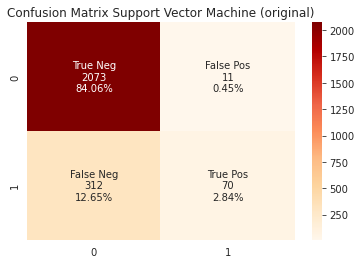

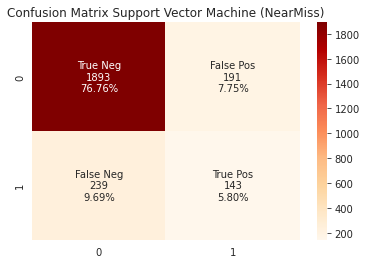

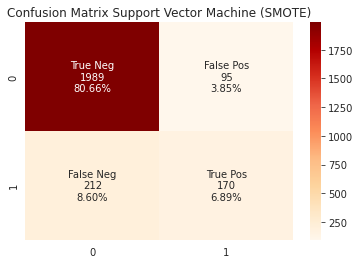

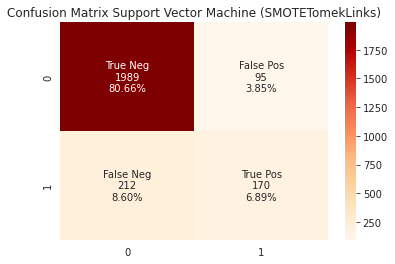

In [82]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('SVM', 'original')
confusion_matrixes('SVM', 'undersampling')
confusion_matrixes('SVM', 'oversampling')
confusion_matrixes('SVM', 'both')

In [83]:
auroc ('SVM', 'original')
auroc ('SVM', 'undersampling')
auroc ('SVM', 'oversampling')
auroc ('SVM', 'both')

SVM - AUROC original:  0.5889838811789652
SVM - AUROC NearMiss:  0.6413474389765954
SVM - AUROC SMOTE:  0.6997203826712625
SVM - AUROC SMOTETomekLinks:  0.6997203826712625


### Random Forest

In [84]:
print('original: ', models['original']['RF']['bestParamsF1'][-2:])
print('undersampling: ', models['undersampling']['RF']['bestParamsF1'][-2:])
print('oversampling: ', models['oversampling']['RF']['bestParamsF1'][-2:])
print('both: ', models['both']['RF']['bestParamsF1'][-2:])

original:  [100, 'log2']
undersampling:  [100, 'sqrt']
oversampling:  [100, 'sqrt']
both:  [1000, 'sqrt']


In [85]:
results['original']['RF']['params']= {'n_estimators':100, 'max_features':'log2'}
results['undersampling']['RF']['params']= {'n_estimators':100, 'max_features':'sqrt'}
results['oversampling']['RF']['params']={'n_estimators':100, 'max_features':'sqrt'}
results['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'sqrt'}

In [86]:
rf = RandomForestClassifier()

results['original']['RF']['predictions'] = rf.set_params(**results['original']['RF']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['RF']['predictions'] = rf.set_params(**results['undersampling']['RF']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['RF']['predictions'] = rf.set_params(**results['oversampling']['RF']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['RF']['predictions'] = rf.set_params(**results['both']['RF']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

Test dataset samples:  2466


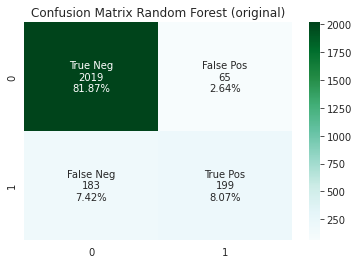

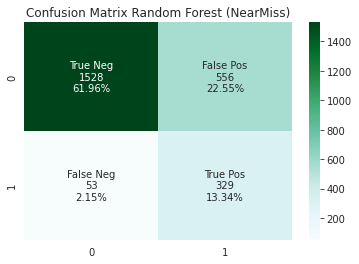

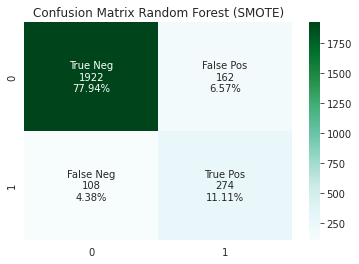

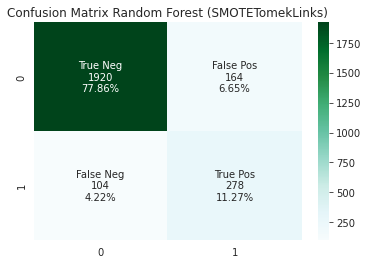

In [87]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('RF', 'original')
confusion_matrixes('RF', 'undersampling')
confusion_matrixes('RF', 'oversampling')
confusion_matrixes('RF', 'both')

In [88]:
auroc ('RF', 'original')
auroc ('RF', 'undersampling')
auroc ('RF', 'oversampling')
auroc ('RF', 'both')

RF - AUROC original:  0.7448761945915527
RF - AUROC NearMiss:  0.797230959391424
RF - AUROC SMOTE:  0.8197711810754589
RF - AUROC SMOTETomekLinks:  0.8245269367205635


In [130]:
from sklearn import metrics

fpr_original, tpr_original, threshold_original = metrics.roc_curve(y_test, results['original']['RF']['predictions'])
roc_auc_original = metrics.auc(fpr_original, tpr_original)

fpr_under, tpr_under, threshold_under = metrics.roc_curve(y_test, results['undersampling']['RF']['predictions'])
roc_auc_under = metrics.auc(fpr_under, tpr_under)

fpr_over, tpr_over, threshold_over = metrics.roc_curve(y_test, results['oversampling']['RF']['predictions'])
roc_auc_over = metrics.auc(fpr_over, tpr_over)

fpr_both, tpr_both, threshold_both = metrics.roc_curve(y_test, results['both']['RF']['predictions'])
roc_auc_both = metrics.auc(fpr_both, tpr_both)

print('AUROC (original): ', roc_auc_original)
print('AUROC (NearMiss): ', roc_auc_under)
print('AUROC (SMOTE): ', roc_auc_over)
print('AUROC (SMOTETomekLinks): ', roc_auc_both)

AUROC (original):  0.736084452975048
AUROC (NearMiss):  0.7973402437921435
AUROC (SMOTE):  0.8169134568037704
AUROC (SMOTETomekLinks):  0.8261850448694115


In [ ]:
print('original: ', models['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models['both']['KNN']['bestParamsF1'][-3:])

In [ ]:
results['macro avg']['LR']['original']

{'f1-score': 0.6988931394281788,
 'precision': 0.6565241531087016,
 'recall': 0.835772894463831,
 'support': 2466}

### KNN

In [ ]:
print('original: ', models['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models['both']['KNN']['bestParamsF1'][-3:])

original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']


In [ ]:
params['KNN'] = {}
params['KNN']['original']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
params['KNN']['undersampling'] = {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
params['KNN']['oversampling']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
params['KNN']['both'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

In [ ]:
knn = KNeighborsClassifier()

predictions['KNN'] = {}

predictions['KNN']['original'] = knn.set_params(**params['KNN']['original']).fit(X_train, y_train).predict(X_test)
predictions['KNN']['undersampling'] = knn.set_params(**params['KNN']['undersampling']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
predictions['KNN']['oversampling'] = knn.set_params(**params['KNN']['oversampling']).fit(X_train_smote, y_train_smote).predict(X_test)
predictions['KNN']['both'] = knn.set_params(**params['KNN']['both']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

In [ ]:
print(classification_report(predictions['KNN']['original'], y_test, output_dict=True))
print( classification_report(predictions['KNN']['undersampling'], y_test, output_dict=True))
print( classification_report(predictions['KNN']['oversampling'], y_test, output_dict=True))
print(classification_report(predictions['KNN']['both'], y_test, output_dict=True))

{'0': {'precision': 0.9875239923224568, 'recall': 0.8757446808510638, 'f1-score': 0.9282814614343707, 'support': 2350}, '1': {'precision': 0.2356020942408377, 'recall': 0.7758620689655172, 'f1-score': 0.36144578313253006, 'support': 116}, 'accuracy': 0.8710462287104623, 'macro avg': {'precision': 0.6115630432816472, 'recall': 0.8258033749082905, 'f1-score': 0.6448636222834504, 'support': 2466}, 'weighted avg': {'precision': 0.9521537813826887, 'recall': 0.8710462287104623, 'f1-score': 0.9016176582376905, 'support': 2466}}
{'0': {'precision': 0.8474088291746641, 'recall': 0.9089037570766856, 'f1-score': 0.8770797119443756, 'support': 1943}, '1': {'precision': 0.5366492146596858, 'recall': 0.3919694072657744, 'f1-score': 0.45303867403314924, 'support': 523}, 'accuracy': 0.7992700729927007, 'macro avg': {'precision': 0.692029021917175, 'recall': 0.65043658217123, 'f1-score': 0.6650591929887624, 'support': 2466}, 'weighted avg': {'precision': 0.78150157921873, 'recall': 0.7992700729927007,

## Plots

0.9067539347984016 expressed by 26 components


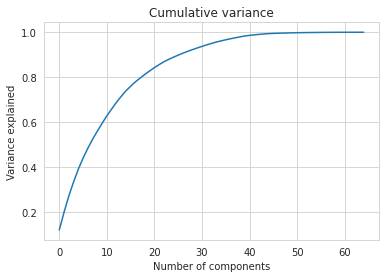

In [ ]:
#%%
X_pca = np.dot(scaled_df, PCA_df.components_[:n_comp,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
X_pca.shape

(12330, 26)

In [ ]:
#%% SMOTE TO BALANCE LABEL
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

seed = 13
sm = SMOTE(random_state = seed)

#Original
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=seed)
X_val_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=seed)

#Original SMOTE
X_train_smote, y_train_smote = sm.fit_resample(X_train_original, y_train_original.ravel())
y_train_smote = pd.Series(y_train_smote)

#PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=seed)

#PCA SMOTE
X_train_pca_smote, y_train_pca_smote = sm.fit_resample(X_train_pca, y_train_pca.ravel())
y_train_pca_smote = pd.Series(y_train_pca_smote)

print(X_train_original.shape, X_train_smote.shape, X_train_pca.shape)
print(y_train_original.shape, y_train_smote.shape, y_train_pca.shape)


(9864, 64) (16628, 64) (9864, 26)
(9864,) (16628,) (9864,)


In [ ]:
#%% MODELS

from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

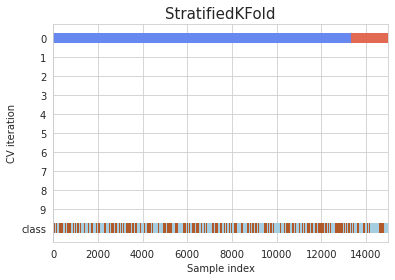

In [ ]:
#%%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
# define model
lr = LogisticRegression(random_state=seed, class_weight=None)
accuracies=[]
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        
        # print(f'Accuracy Score: {accuracy_score(y.iloc[tt],y_pred)}')
        # accuracies.append(accuracy_score(y.iloc[tt],y_pred))
        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, X.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


fig, ax = plt.subplots()
n_splits=10
cv = StratifiedKFold(n_splits, shuffle=False)
X_train_smote, y_train_smote = shuffle(X_train_smote, y_train_smote)
plot_cv_indices(cv, X_train_smote, y_train_smote, y_train_smote, ax, n_splits)


In [ ]:
#  accuracy_score(y_test,results['LR']['y_pred'])

0.8550959718842931

In [ ]:
#  accuracy_score(y_test,results['KNN']['y_pred'])

0.8469856718031901

In [ ]:
#  accuracy_score(y_test,results['RF']['y_pred'])

0.8902406055690727

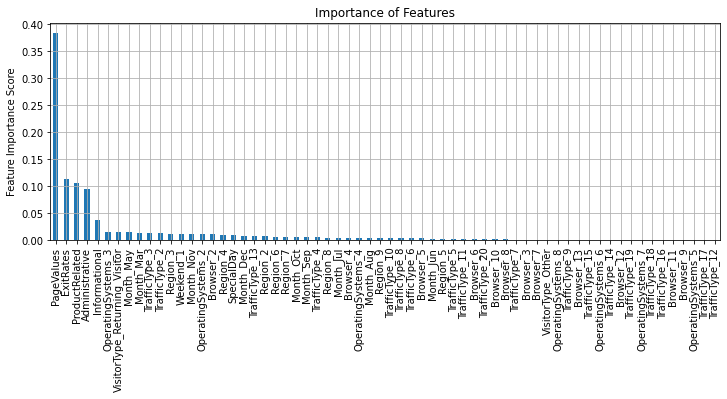

In [ ]:
feat_imp = pd.Series(RFgrid_search.best_estimator_.feature_importances_, list(X_train_smote)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()